# 1. 문제 정의

### 광고 비용으로 매출을 예측해보자

### 지도학습 / 회귀

# 2. 데이터 수집

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# 3. 데이터 전처리

In [6]:
X = data.iloc[:,:3]
y = data.iloc[:,3]

# 4. EDA

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

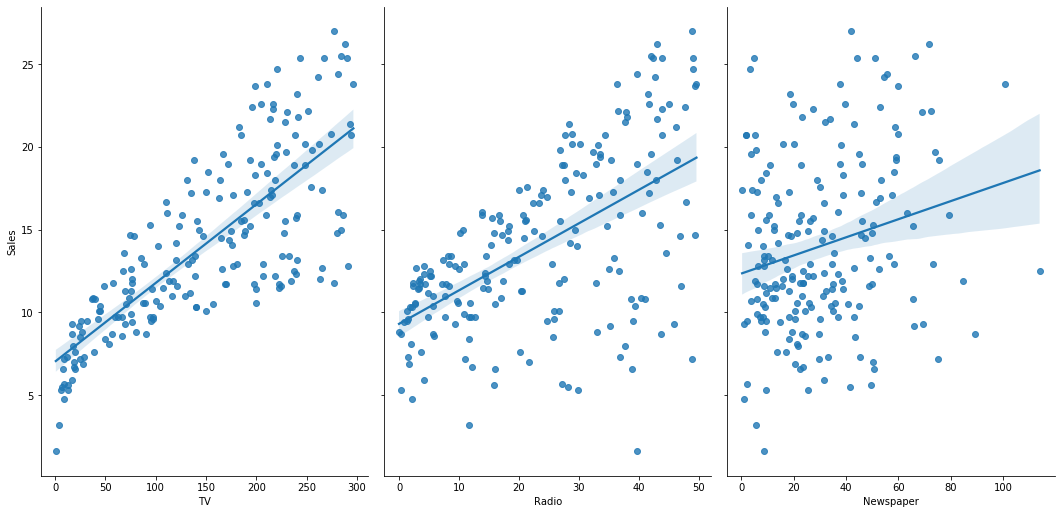

In [27]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', 
             height=7, aspect=0.7, kind='reg')
#aspect : 너비(인치)

# 5. 모델 선택, 학습, 평가

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# y = w1*x1 + w2*x2 + w3*x3 + b

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("계수: {}".format(model.coef_))
print("절편: {}".format(model.intercept_))

계수: [0.04391531 0.20027962 0.00184368]
절편: 2.880255286331325


# y = 0.044 * TV + 0.2 * Radio + 0.002 * Newspaper + 2.88

In [16]:
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9065727532450597
테스트 세트 점수: 0.8649018906637793


## - RMSE

In [17]:
y_pred = model.predict(X_test)

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.921300300759516

# 가장 영향력이 없는 신문을 지워보자(살짝오름)

In [20]:
feature = ['TV', 'Radio']

In [21]:
X = data[feature]

In [22]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9065235649327258
테스트 세트 점수: 0.8656552691810044


In [30]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.9159357179956469

# 더 향상 시킬수 있는 방법은?

In [69]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [70]:
X = data.iloc[:,:2].copy()#안하면 Warning
y = data.iloc[:,3].copy()

In [71]:
col = X.columns
for i in range(col.size):
    for j in range(i,col.size):
        X[col[i]+'x'+col[j]] = X[col[i]]*X[col[j]]

In [72]:
print(X.shape)
X.head()

(200, 5)


,TV,Radio,TVxTV,TVxRadio,RadioxRadio
1,230.1,37.8,52946.01,8697.78,1428.84
2,44.5,39.3,1980.25,1748.85,1544.49
3,17.2,45.9,295.84,789.48,2106.81
4,151.5,41.3,22952.25,6256.95,1705.69
5,180.8,10.8,32688.64,1952.64,116.64


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)
print("훈련 세트 점수: {}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(model.score(X_test, y_test)))

훈련 세트 점수: 0.9912495632936611
테스트 세트 점수: 0.9729857942978335


In [75]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.8591454934312549

# 스케일링(교재 3장 코드참조)
- StandardScaler : 평균을 0, 분산을 1로 변경하여 같은 크기를 가지게 됨
- RobustScaler : 중앙값과 사분위값을 사용하여 특성들이 같은 스케일을 갖게 됨(이상치에 영향받지않음)
- MinMaxScaler : 모든특성이 정확하게 0과 1사이에 위치
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 조절

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [106]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [112]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print("RMSE 점수: {:.5f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.993
RMSE 점수: 0.41519
